## 2. Bar Plot & Histogram

### Bar Plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})
wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

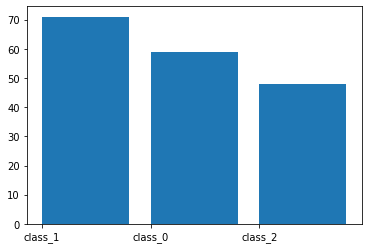

In [2]:
plt.bar(wine_type.index, wine_type.values,               # 데이터의 x, 높이
        width = 0.8, bottom = None,        # 막대의 넓이와 막대 밑면의 y좌표
        align = 'edge')        # 막대의 정렬
plt.show()

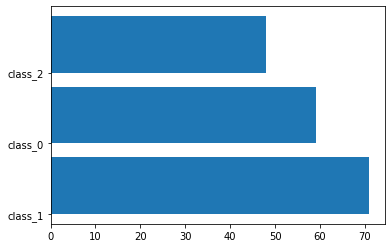

In [3]:
plt.barh(wine_type.index, wine_type.values, height = 0.8, left = None, align = 'edge')
plt.show()

<br>

### Histogram

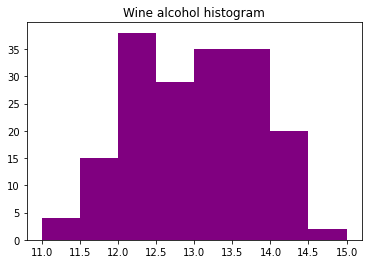

In [4]:
plt.title('Wine alcohol histogram')
plt.hist('alcohol', bins = 8, range = (11, 15), color='purple', data = wine)
plt.show()

## 3. Box plot

In [5]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

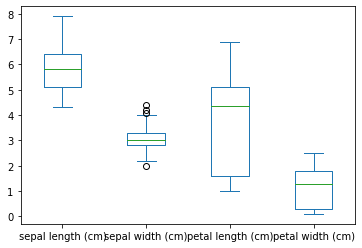

In [6]:
iris.drop(columns='Class').plot(kind='box')
plt.show()

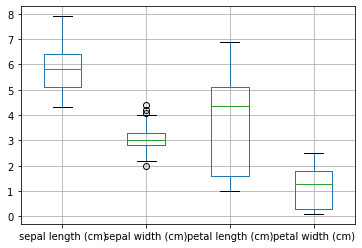

In [7]:
import matplotlib.pyplot as plt
iris.drop(columns='Class').boxplot()
plt.show()

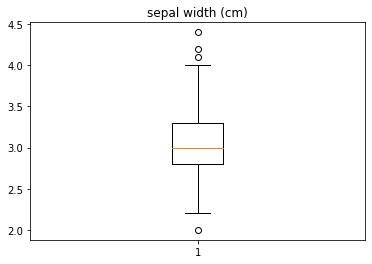

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(iris['sepal width (cm)'], whis=1.5)
plt.title('sepal width (cm)')
plt.show()

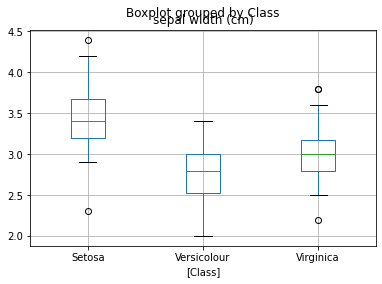

In [9]:
import matplotlib.pyplot as plt
iris[['sepal width (cm)', 'Class']].boxplot(by='Class')
plt.show()

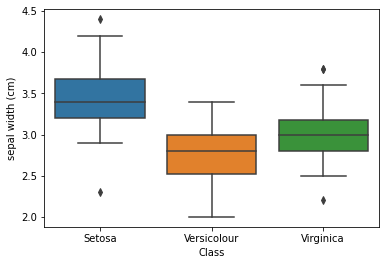

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="Class", y="sepal width (cm)", data=iris)
plt.show()

<br><br>

## 4. Scatter Plot

In [11]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


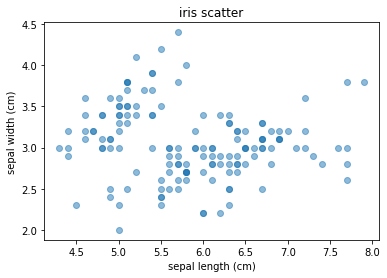

In [12]:
plt.title('iris scatter') 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)') 

plt.scatter(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], alpha = 0.5)
plt.show()

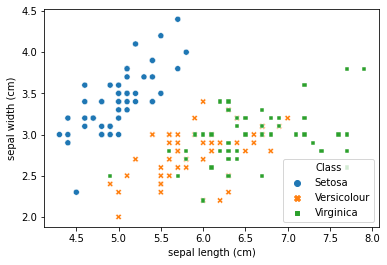

In [13]:
import seaborn as sns

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='Class', style='Class')
plt.show()

<br><br>

## 5. Line Plot

### 직선 그래프

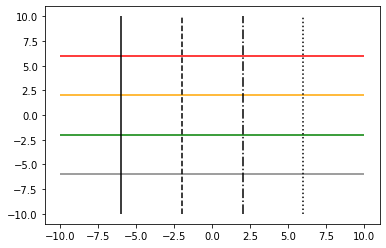

In [14]:
import matplotlib.pyplot as plt

plt.hlines(-6, -10, 10, color='grey')
plt.hlines(-2, -10, 10, color='green')
plt.hlines(2, -10, 10, color='orange')
plt.hlines(6, -10, 10, color='red')

plt.vlines(-6, -10, 10, linestyles='solid')
plt.vlines(-2, -10, 10, linestyles='dashed')
plt.vlines(2, -10, 10, linestyles='dashdot')
plt.vlines(6, -10, 10, linestyles='dotted')
plt.show()

### 함수식 그래프

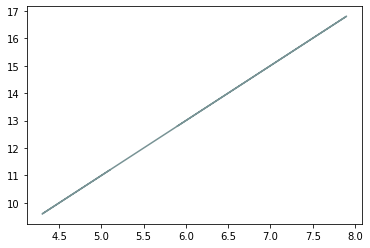

In [15]:
def linear_func(x):
  return x*2 + 1 

X = iris['sepal length (cm)']
plt.plot(X, linear_func(X), c='#789395')
plt.show()

### 회귀선 그래프

#### 일차 함수 회귀식


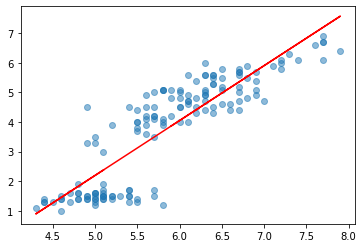

In [16]:
import numpy as np

X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X, Y, 1)

plt.scatter(x = X, y = Y, alpha = 0.5)
plt.plot(X, b1*X + b0, color='red')
plt.show()

#### n차 함수 회귀식

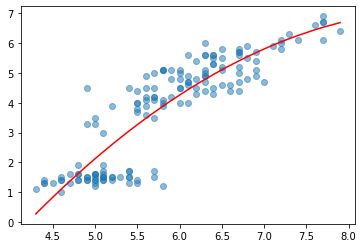

In [17]:
import numpy as np

iris2 = iris.sort_values(by='sepal length (cm)')
X, Y = iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0 = np.polyfit(X, Y, 2)

plt.scatter(x = X, y = Y, alpha = 0.5)
plt.plot(X, b0 + b1*X + b2*X**2, color='red')
plt.show()

### 꺾은선 그래프

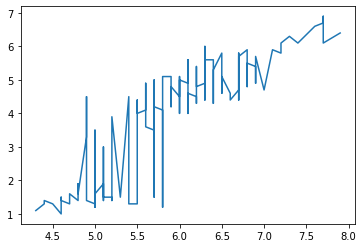

In [18]:
import matplotlib.pyplot as plt

iris2 = iris.sort_values(by='sepal length (cm)')
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2)
plt.show( )

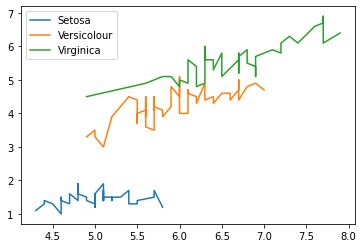

In [19]:
# 특정 카테고리별로 그래프를 겹쳐 그릴 때 카테고리별로 plot을 그리고 범례를 제시함
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['Class'] == 'Setosa'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['Class'] == 'Versicolour'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['Class'] == 'Virginica'])
plt.legend(iris2.Class.unique())
plt.show()

## 6. 상관관계 시각화

### 산점도 행렬

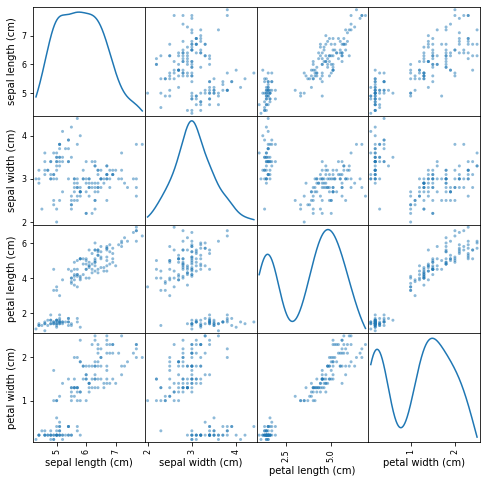

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

scatter_matrix(iris, alpha = 0.5, figsize = (8, 8), diagonal = 'kde')
plt.show()

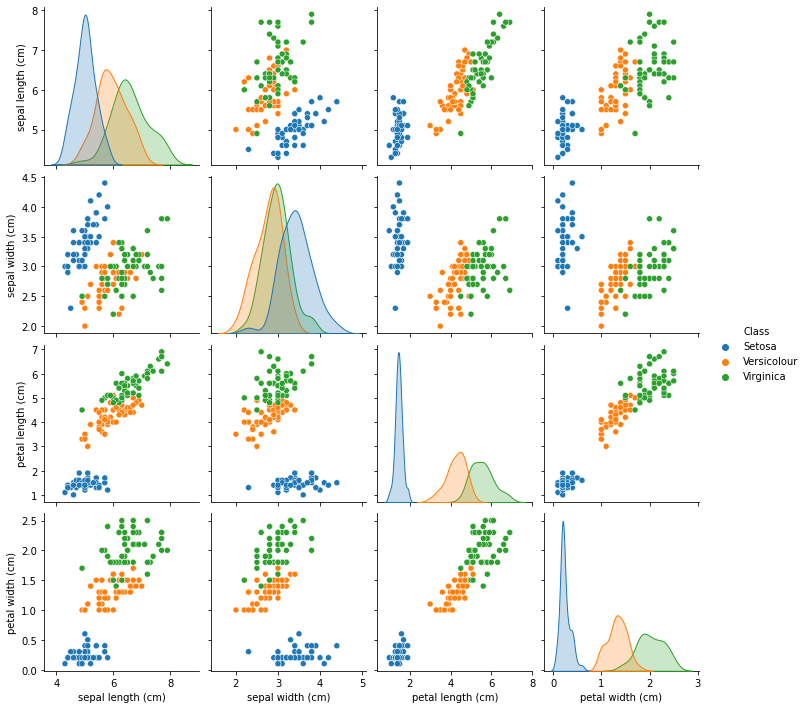

In [21]:
import seaborn as sns

sns.pairplot(iris, diag_kind = 'auto', hue = 'Class')
plt.show()

In [25]:
iris_feature

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 상관행렬 그래프

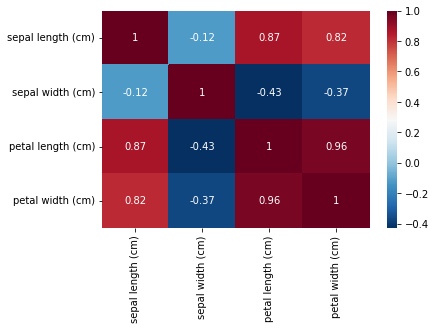

In [30]:
iris_corr = iris.drop(columns='Class').corr(method='pearson')
sns.heatmap(iris_corr, xticklabels = iris_corr.columns, yticklabels = iris_corr.columns, cmap = 'RdBu_r', annot = True)
plt.show()

## Pandas Profiling

Colab에서 수행하는 경우 pandas_profiling 재설치

In [2]:
# !pip uninstall pandas_profiling
# !pip install pandas-profiling[notebook,html]

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from pandas_profiling import ProfileReport

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

ProfileReport(iris)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]